In [2]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [4]:
df.info()
#changing Bedtime & Wake-up Time to date time format hour and min
#and calculte the sleep time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [5]:
df['Bedtime'] = pd.to_datetime(df['Bedtime']).dt.time
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time']).dt.time

# Function to convert time to hours
def time_to_hours(t):
    return t.hour + t.minute / 60 + t.second / 3600

# Convert 'Bedtime' and 'Wake-up Time' to hours
df['Bedtime_hours'] = df['Bedtime'].apply(time_to_hours)
df['Wakeup_hours'] = df['Wake-up Time'].apply(time_to_hours)

# Calculate sleep time in hours
df['Sleep_time'] = df['Wakeup_hours'] - df['Bedtime_hours']

# Adjust for cases sleep time in -
df.loc[df['Sleep_time'] < 0, 'Sleep_time'] += 24

df.head()


C:\Users\Mostafa\AppData\Local\Temp\ipykernel_37780\2729899057.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Bedtime'] = pd.to_datetime(df['Bedtime']).dt.time
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_37780\2729899057.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time']).dt.time


,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Bedtime_hours,Wakeup_hours,Sleep_time
0,1,25,f,8,23:00:00,06:30:00,8000,2500,medium,healthy,no,no,23.00,6.50,7.5
1,2,34,m,7,00:30:00,07:00:00,5000,2200,low,unhealthy,yes,yes,0.50,7.00,6.5
2,3,29,f,9,22:45:00,06:45:00,9000,2700,high,healthy,no,no,22.75,6.75,8.0
3,4,41,m,5,01:00:00,06:30:00,4000,2100,low,unhealthy,yes,no,1.00,6.50,5.5
4,5,22,f,8,23:30:00,07:00:00,10000,2800,high,medium,no,no,23.50,7.00,7.5


In [6]:
df.info()
#drop BedTime & Wake-up Time & User ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  100 non-null    int64  
 1   Age                      100 non-null    int64  
 2   Gender                   100 non-null    object 
 3   Sleep Quality            100 non-null    int64  
 4   Bedtime                  100 non-null    object 
 5   Wake-up Time             100 non-null    object 
 6   Daily Steps              100 non-null    int64  
 7   Calories Burned          100 non-null    int64  
 8   Physical Activity Level  100 non-null    object 
 9   Dietary Habits           100 non-null    object 
 10  Sleep Disorders          100 non-null    object 
 11  Medication Usage         100 non-null    object 
 12  Bedtime_hours            100 non-null    float64
 13  Wakeup_hours             100 non-null    float64
 14  Sleep_time               10

In [7]:
df.drop({'Bedtime', 'Wake-up Time', 'User ID'}, axis=1, inplace=True)
df.head()

,Age,Gender,Sleep Quality,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Bedtime_hours,Wakeup_hours,Sleep_time
0,25,f,8,8000,2500,medium,healthy,no,no,23.00,6.50,7.5
1,34,m,7,5000,2200,low,unhealthy,yes,yes,0.50,7.00,6.5
2,29,f,9,9000,2700,high,healthy,no,no,22.75,6.75,8.0
3,41,m,5,4000,2100,low,unhealthy,yes,no,1.00,6.50,5.5
4,22,f,8,10000,2800,high,medium,no,no,23.50,7.00,7.5


Understanding Data

In [8]:
df.describe()

,Age,Sleep Quality,Daily Steps,Calories Burned,Bedtime_hours,Wakeup_hours,Sleep_time
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,36.010000,7.000000,6830.000000,2421.00000,11.867500,6.860000,6.992500
std,8.454865,1.734964,2498.706736,281.06759,11.001863,0.449916,1.164205
min,22.000000,4.000000,3000.000000,2000.00000,0.250000,6.000000,4.500000
25%,28.750000,5.750000,4750.000000,2175.00000,0.937500,6.500000,6.437500
50%,35.000000,7.500000,6750.000000,2400.00000,11.750000,7.000000,7.000000
75%,44.000000,8.250000,9000.000000,2700.00000,22.812500,7.062500,8.000000
max,50.000000,9.000000,11000.000000,2900.00000,23.750000,7.500000,9.000000


In [9]:
cat_colu = df.select_dtypes(include='O').columns
for col in cat_colu:
    print(f'the number of uniques in \'{col}\' is {df[col].nunique()}')
    print(f'the uniques in \'{col}\' is {df[col].unique()}')
    print()
    print('*' * 50)
    print()

the number of uniques in 'Gender' is 2
the uniques in 'Gender' is ['f' 'm']

**************************************************

the number of uniques in 'Physical Activity Level' is 3
the uniques in 'Physical Activity Level' is ['medium' 'low' 'high']

**************************************************

the number of uniques in 'Dietary Habits' is 3
the uniques in 'Dietary Habits' is ['healthy' 'unhealthy' 'medium']

**************************************************

the number of uniques in 'Sleep Disorders' is 2
the uniques in 'Sleep Disorders' is ['no' 'yes']

**************************************************

the number of uniques in 'Medication Usage' is 2
the uniques in 'Medication Usage' is ['no' 'yes']

**************************************************



In [10]:
cat_colu = df.select_dtypes(include='O').columns
for col in cat_colu:
    print(f'the count of uniques in \'{col}\' is {df[col].value_counts()}')
    print()
    print('*' * 50)
    print()

the count of uniques in 'Gender' is Gender
f    50
m    50
Name: count, dtype: int64

**************************************************

the count of uniques in 'Physical Activity Level' is Physical Activity Level
medium    38
high      36
low       26
Name: count, dtype: int64

**************************************************

the count of uniques in 'Dietary Habits' is Dietary Habits
unhealthy    41
medium       30
healthy      29
Name: count, dtype: int64

**************************************************

the count of uniques in 'Sleep Disorders' is Sleep Disorders
no     74
yes    26
Name: count, dtype: int64

**************************************************

the count of uniques in 'Medication Usage' is Medication Usage
no     80
yes    20
Name: count, dtype: int64

**************************************************



UNI-Variate Analyzis 

univariate analyzis of Age


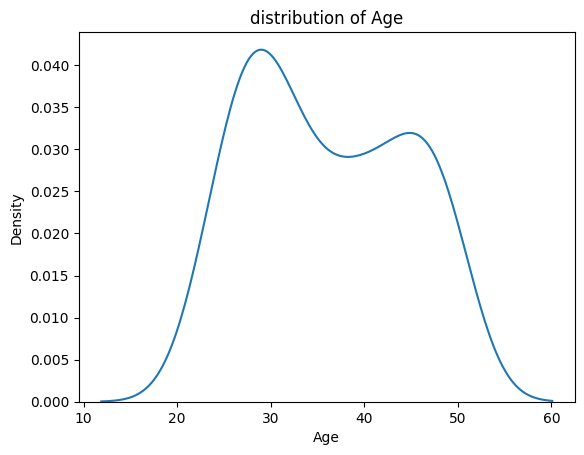

univariate analyzis of Sleep Quality


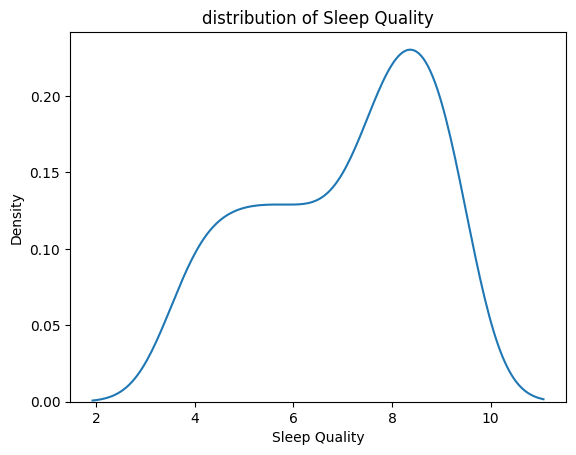

univariate analyzis of Daily Steps


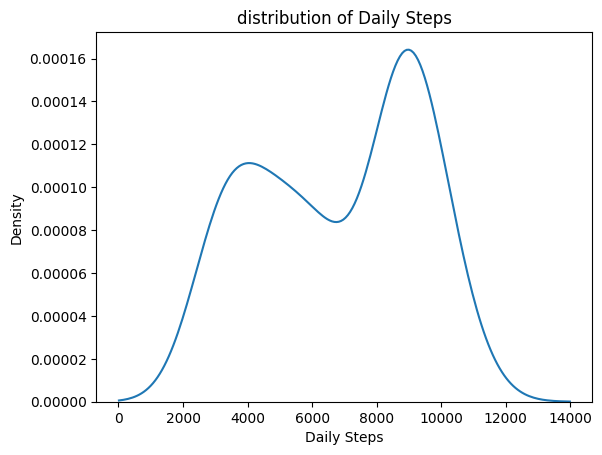

univariate analyzis of Calories Burned


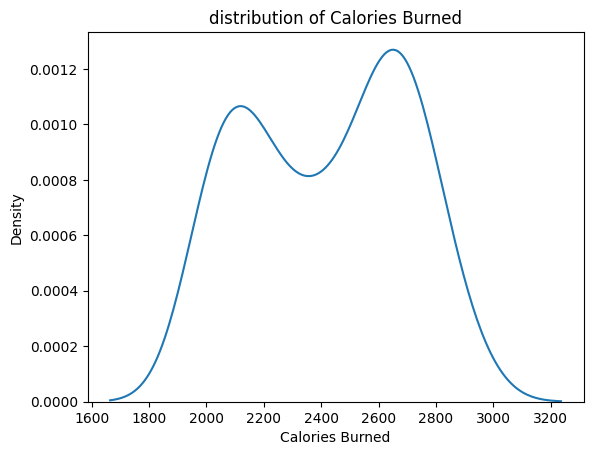

univariate analyzis of Bedtime_hours


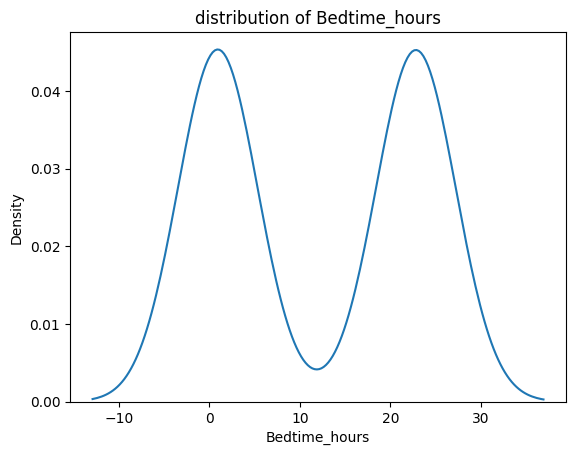

univariate analyzis of Wakeup_hours


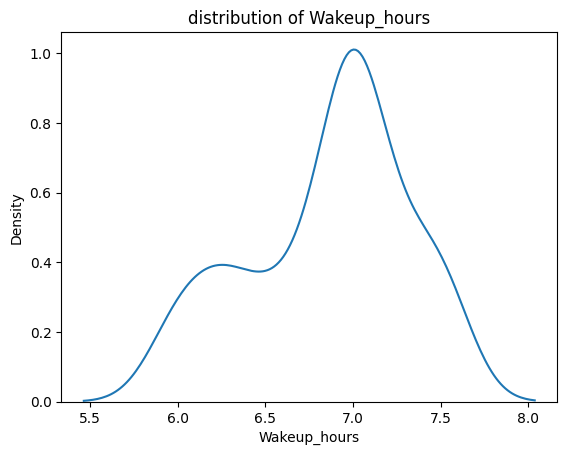

univariate analyzis of Sleep_time


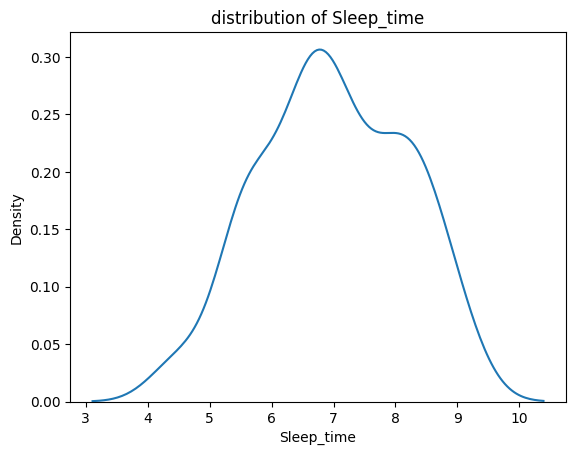

In [26]:
num_col = df.select_dtypes(include='number').columns
for col in num_col:
    print(f'univariate analyzis of {col}')
    fig_1 = px.histogram(df, x = col)
    fig_1.update_layout(title = f'distribution of {col}')
    fig_1.show() 

    fig_2 = px.box(df, x = col)
    fig_2.update_layout(title = f'distribution of {col}')
    fig_2.show()  

    fig_3 = sns.kdeplot(x = df[col])
    plt.title(f'distribution of {col}')
    plt.show()  

In [12]:
for col in cat_colu:
    if df[col].nunique() < 7:
        dff = df.groupby(col)[['Age']].count().reset_index().sort_values(by='Age', ascending=False)
        cat_fig = px.pie(names= dff[col], values= dff['Age'], title=f'Distribution of {col}')
        cat_fig.show()
    else:
        cat_fig_2 = px.histogram(df, x=col , title=f'distribution of {col}')
        cat_fig_2.show()

BI-Variate Analyzis 

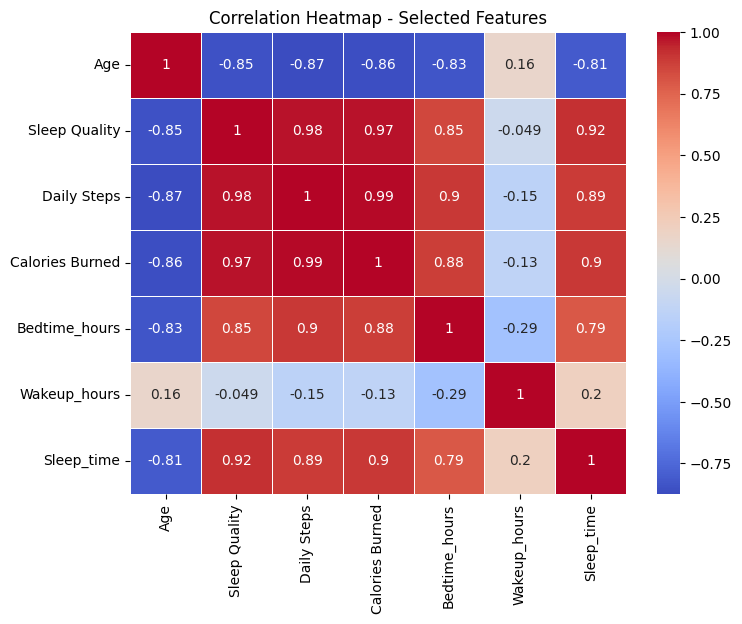

In [13]:
dff = df.select_dtypes(include='number')
plt.figure(figsize=(8,6))
sns.heatmap(dff.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Selected Features')
plt.show()


In [14]:
df.head()

,Age,Gender,Sleep Quality,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Bedtime_hours,Wakeup_hours,Sleep_time
0,25,f,8,8000,2500,medium,healthy,no,no,23.00,6.50,7.5
1,34,m,7,5000,2200,low,unhealthy,yes,yes,0.50,7.00,6.5
2,29,f,9,9000,2700,high,healthy,no,no,22.75,6.75,8.0
3,41,m,5,4000,2100,low,unhealthy,yes,no,1.00,6.50,5.5
4,22,f,8,10000,2800,high,medium,no,no,23.50,7.00,7.5


Q1 - Does Age Affect Sleep Quality?

Compare the relationship between Age and Sleep Quality. Older or younger individuals may experience different levels of sleep quality.

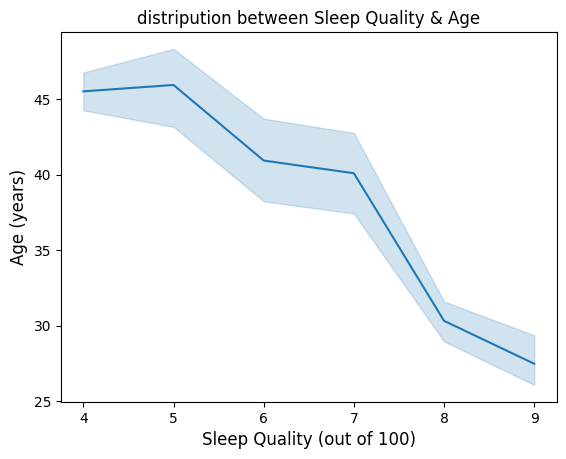

<Figure size 1000x2000 with 0 Axes>

In [15]:
sns.lineplot(x=df['Sleep Quality'], y=df['Age'])
plt.title('distripution between Sleep Quality & Age')
plt.xlabel('Sleep Quality (out of 100)', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.figure(figsize=(10, 20))
plt.show()


Q2-How Does Gender Influence Sleep Disorders?

Analyze whether there are gender-based differences in the occurrence of Sleep Disorders between male and female participants.


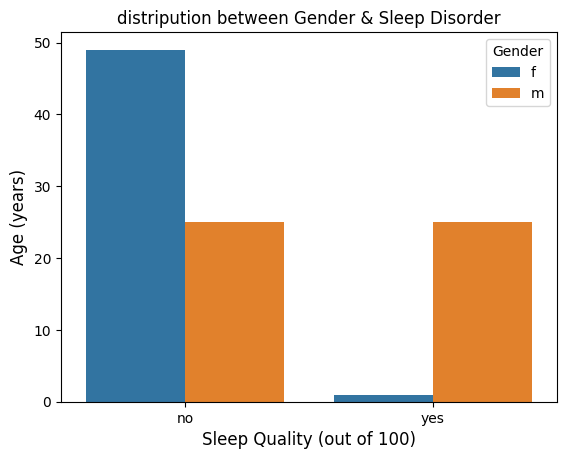

<Figure size 1000x2000 with 0 Axes>

In [16]:
sns.countplot(x=df['Sleep Disorders'], hue=df['Gender'])
plt.title('distripution between Gender & Sleep Disorder')
plt.xlabel('Sleep Quality (out of 100)', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.figure(figsize=(10, 20))
plt.show()


Q3-Is There a Link Between Bedtime and Sleep Quality?


Investigate the impact of Bedtime on Sleep Quality. Does going to bed earlier or later affect how well someone sleeps?

In [17]:
dff = df.groupby(['Sleep Quality', 'Gender'])[['Bedtime_hours']].mean().reset_index().sort_values(by='Bedtime_hours', ascending=True)
fig_p1 = px.line(dff, x='Bedtime_hours', y='Sleep Quality',color='Gender')
fig_p1.update_layout(
    title = 'distribution between Bedtime & Sleep Quality across each Gender',
    xaxis_title = 'Bed Time in hours',
    yaxis_title = 'Sleep Quality (0, 10)'
)

Q4-What’s the Relationship Between Physical Activity Level and Sleep Quality?


Explore whether a higher Physical Activity Level correlates with better Sleep Quality.

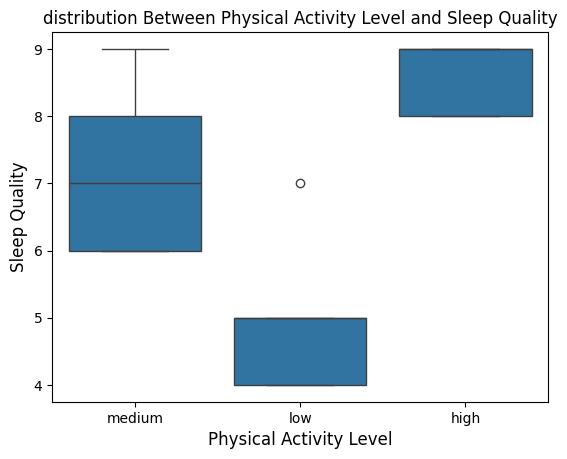

<Figure size 1000x2000 with 0 Axes>

In [18]:
sns.boxplot(x=df['Physical Activity Level'], y=df['Sleep Quality'])
plt.title('distribution Between Physical Activity Level and Sleep Quality')
plt.xlabel('Physical Activity Level', fontsize=12)
plt.ylabel('Sleep Quality', fontsize=12)
plt.figure(figsize=(10, 20))
plt.show()

Q5-Do Daily Steps Influence Calories Burned?


Analyze the relationship between Daily Steps and Calories Burned to see if increased activity directly leads to more calories burned.


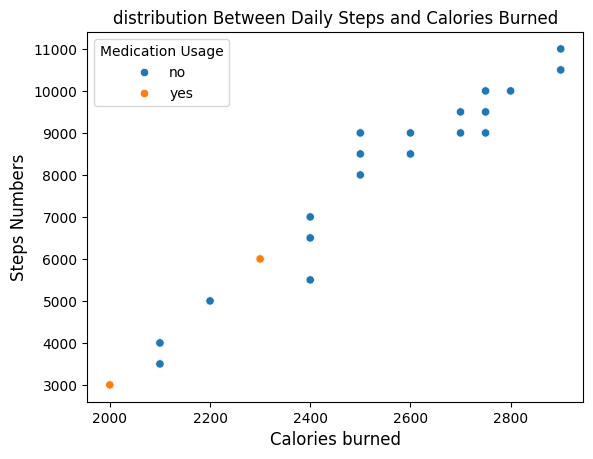

<Figure size 1000x1500 with 0 Axes>

In [19]:
sns.scatterplot(x=df['Calories Burned'], y=df['Daily Steps'], hue=df['Medication Usage'])
plt.title('distribution Between Daily Steps and Calories Burned')
plt.xlabel('Calories burned', fontsize=12)
plt.ylabel('Steps Numbers', fontsize=12)
plt.figure(figsize=(10, 15))
plt.show()

Q6-Does Sleep Time & sleep Disorder Affect Sleep Quality ?

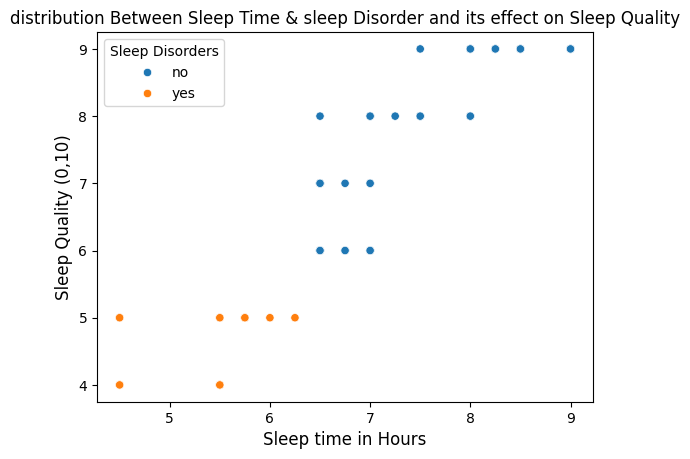

<Figure size 1000x2000 with 0 Axes>

In [20]:
sns.scatterplot(x=df['Sleep_time'], y=df['Sleep Quality'], hue=df['Sleep Disorders'])
plt.title('distribution Between Sleep Time & sleep Disorder and its effect on Sleep Quality')
plt.xlabel('Sleep time in Hours', fontsize=12)
plt.ylabel('Sleep Quality (0,10)', fontsize=12)
plt.figure(figsize=(10, 20))
plt.show()

Q7-Is There a Correlation Sleep Time, Dietary Habits & Medication Usage?

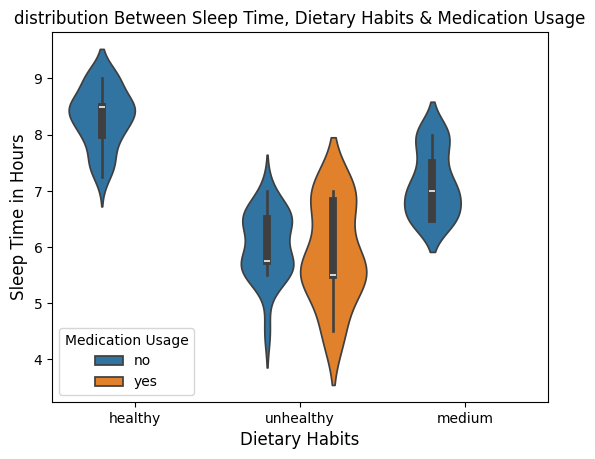

<Figure size 1000x2500 with 0 Axes>

In [21]:
sns.violinplot(x=df['Dietary Habits'], y=df['Sleep_time'], hue=df['Medication Usage'])
plt.title('distribution Between Sleep Time, Dietary Habits & Medication Usage')
plt.xlabel('Dietary Habits', fontsize=12)
plt.ylabel('Sleep Time in Hours', fontsize=12)
plt.figure(figsize=(10, 25))
plt.show()

Q8- the relqtion between Physical Activity Level and calories burned and does it Differ by Gender?


Explore whether men and women have different Physical Activity Levels, which could influence health and sleep statistics.

In [22]:
fig_p2 = px.box(x=df['Physical Activity Level'], y=df['Calories Burned'], color=df['Gender'])
fig_p2.update_layout(
    title = 'Distribution Between Physical Activity Level and calories burned and does it Differ by Gender',
    xaxis_title = 'Physical Activity Level',
    yaxis_title =  'Number of Calories Burned'
)

Q9-What is the Impact of Sleep Disordes on Sleep Quality and is it differ if was there Medication Usage?

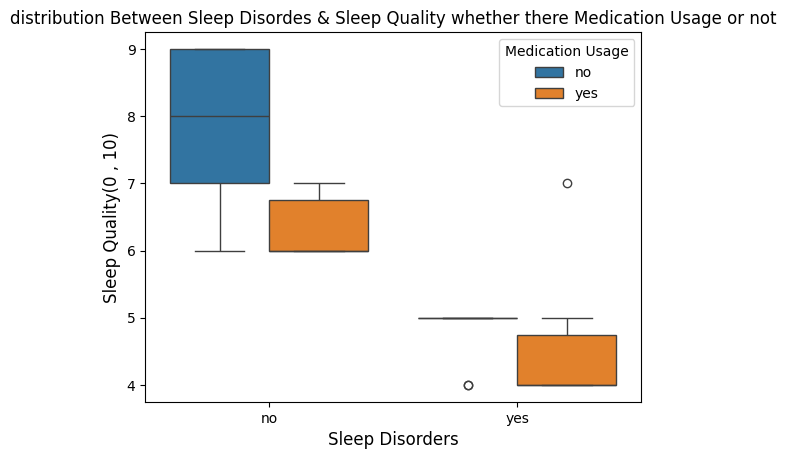

<Figure size 1000x2000 with 0 Axes>

In [23]:
sns.boxplot(x=df['Sleep Disorders'], y=df['Sleep Quality'], hue=df['Medication Usage'])
plt.title('distribution Between Sleep Disordes & Sleep Quality whether there Medication Usage or not')
plt.xlabel('Sleep Disorders', fontsize=12)
plt.ylabel('Sleep Quality(0 , 10)', fontsize=12)
plt.figure(figsize=(10, 20))
plt.show()

How Does Age Affect Calories Burned and dose it lead to sleeping disorder and how it differ bettween each gender?

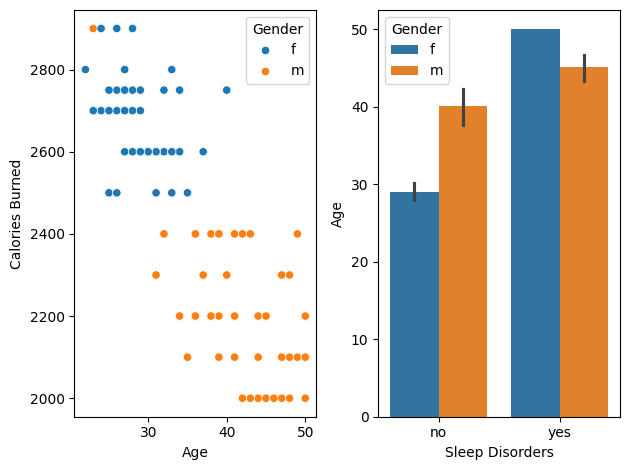

In [24]:
plt.subplot(1,2,1)
sns.scatterplot(x=df['Age'], y=df['Calories Burned'], hue=df['Gender'])

plt.subplot(1,2,2)
sns.barplot(x=df['Sleep Disorders'], y=df['Age'], hue=df['Gender'])

plt.tight_layout()

MULTI-Variate Analyzis 

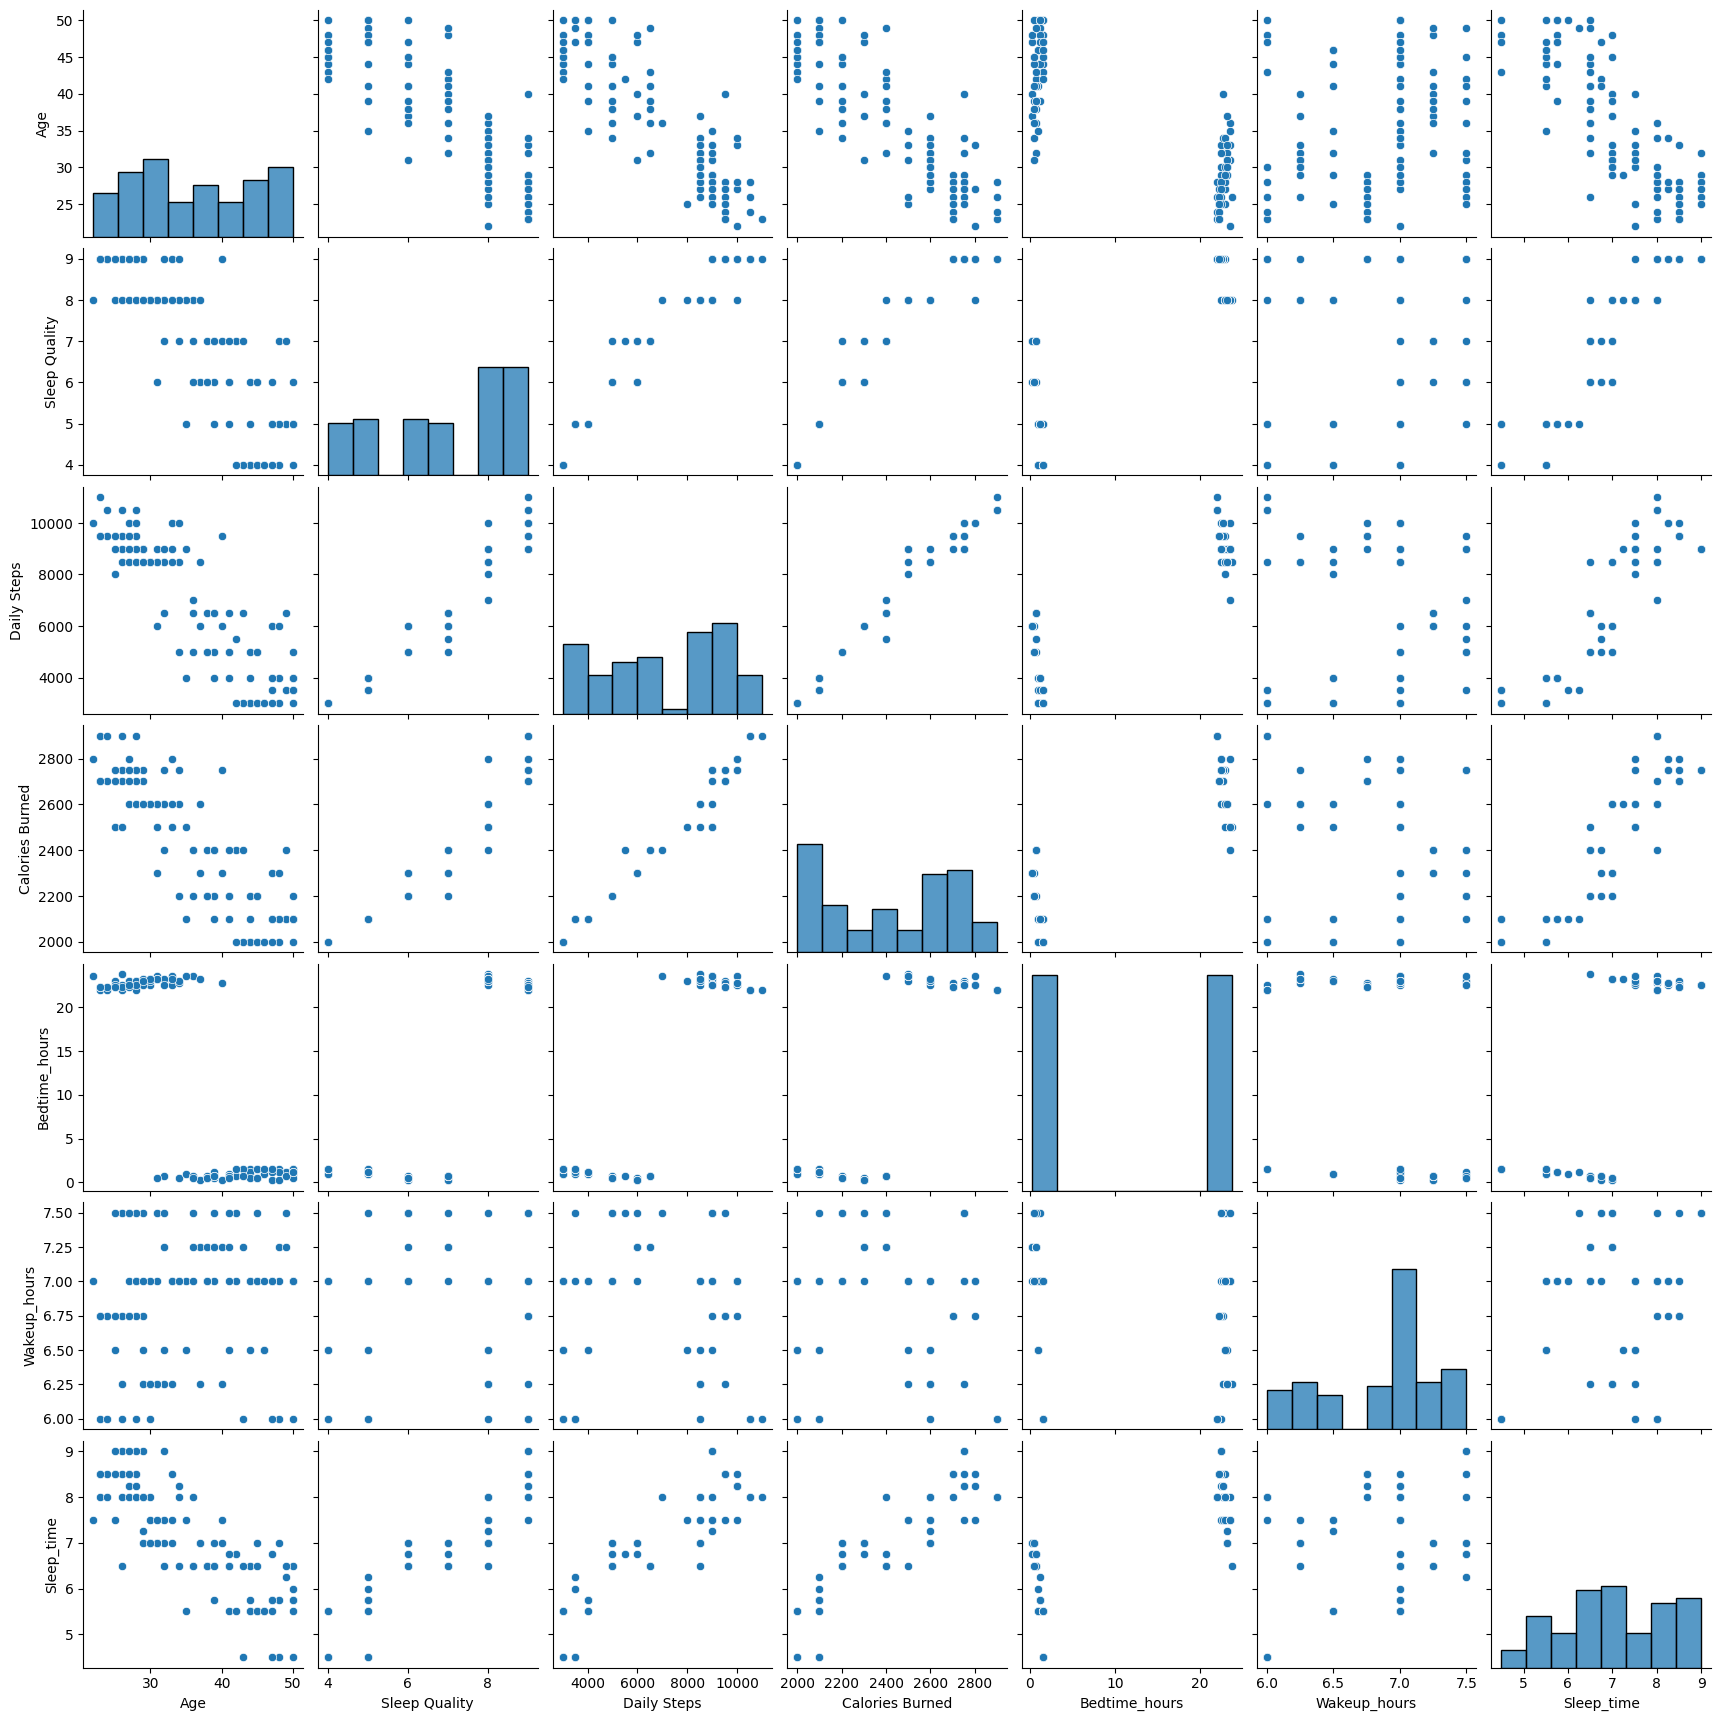

In [25]:
sns.pairplot(df)